In [1]:
# フォントを全て読み込み
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
DAYS=240

In [3]:
sigma=0.1/np.sqrt(DAYS)
print(f"ボラティリティ10％に相当する日次ベースの標準偏差{sigma:2.4f}")
rng = np.random.default_rng()
w=rng.standard_normal(DAYS)
P=[1]
for i in range(1,DAYS+1):
    P.append(P[i-1]+sigma*(w[i-1]))
#---------------------------------------------------------------------
p0=[1]
p=p0+(sigma*w).cumsum()
p0.extend(p)

ボラティリティ10％に相当する日次ベースの標準偏差0.0065


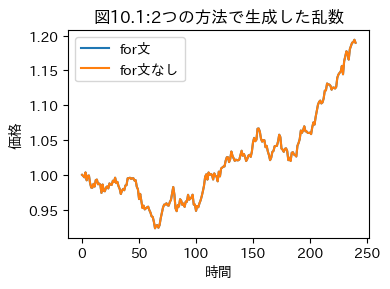

In [4]:
plt.figure(figsize=(4,3))
plt.plot(P,label='for文')
plt.plot(p0,label='for文なし')
plt.legend()
plt.ylabel('価格')
plt.xlabel('時間')
plt.title('図10.1:2つの方法で生成した乱数')
plt.tight_layout()
#plt.savefig('図10.1.jpeg',dpi=600)
plt.show()

In [5]:
def descriptive_stats(tsd):
    stats=[tsd.mean().iloc[0],tsd.std().iloc[0],tsd.skew().iloc[0],tsd.kurt().iloc[0]]
    name =[x for x in globals() if globals()[x] is tsd][0]
    return pd.DataFrame([stats],index=[name],
                        columns=["平均","標準偏差","歪度","尖度(0)"])
price=pd.DataFrame(P,columns=['価格'])
dp=price.diff().dropna()
descriptive_stats(dp)

,平均,標準偏差,歪度,尖度(0)
dp,0.00079,0.006525,-0.084012,0.020097


In [6]:
def plot_hist_scatter(tsd1,tsd2,xlabel1,ylabel1,xlabel2,ylabel2,
                   title1,title2,title3):
    plt.figure(figsize=(7,2.5))
    tsd1.plot(color='darkgray',ax=plt.subplot(131))
    plt.xlabel(xlabel1)
    plt.ylabel(ylabel1)
    plt.title(title1)
    #tsd2=tsd2.dropna()
    tsd2.hist(color='lightgreen',ax=plt.subplot(132))
    plt.xlabel(xlabel2)
    plt.ylabel(ylabel2)
    plt.title(title2)
    ax3=plt.subplot(133)
    ax3.scatter(tsd2,tsd2.shift(),color='lightgreen')

    mx=round(tsd2.dropna().max().iloc[0],4)
    mn=round(tsd2.dropna().min().iloc[0],4)
    ave=round(tsd2.dropna().mean().iloc[0],4)
    plt.xticks([mn,ave,mx])
    plt.yticks([mn,ave,mx])
    plt.title(title3)
    plt.tight_layout()
    #plt.savefig(title1[:6]+'.jpeg',dpi=600)
    plt.show()

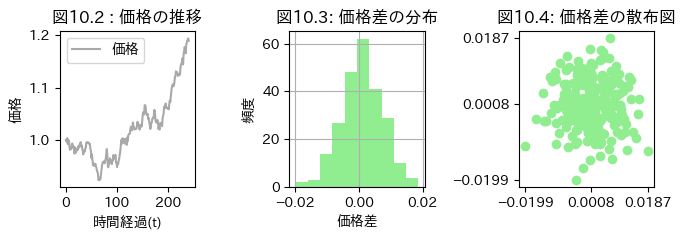

In [7]:
plot_hist_scatter(price,price.diff(),'時間経過(t)','価格','価格差','頻度',
                  '図10.2 : 価格の推移','図10.3: 価格差の分布',
                  '図10.4: 価格差の散布図')

In [8]:
def generateTSD(sigma,trial,n,a,b):
    rng = np.random.default_rng()
    P1,dP=[],[]
    high,low=np.zeros(n),np.ones(n)
    for j in range(trial):
        x=x0=1
        for i in range(n): 
            w=rng.standard_normal()
            x=a+b*x0+sigma*w
            if x>high[i]:
                high[i]=x
            if x<low[i]:
                low[i]=x
            dP.append(x-x0)
            x0=x
        P1.append(x)
    pn=pd.DataFrame(P1,columns=['p_n'])
    dP=pd.DataFrame(dP,columns=['dP'])
    highlow=np.transpose([high,low])
    highlow=pd.DataFrame(highlow,columns=['最大値','最小値'])
    return pn,highlow,dP

In [9]:
p240,highlow,dP=generateTSD(sigma,10000,240,0,1)

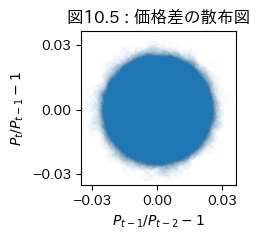

In [10]:
def scatter(tsd1,tsd2,title):
    plt.figure(figsize=(2,2))
    mx=round(dP.dropna().max().iloc[0],2)
    mn=round(dP.dropna().min().iloc[0],2)
    plt.scatter(dP.shift(),dP,alpha=0.01)
    plt.xlabel('$P_{t-1}/P_{t-2}-1$')
    plt.ylabel('$P_t/P_{t-1}-1$')
    plt.xticks([mn,0,mx])
    plt.yticks([mn,0,mx])
    plt.title(title)
    #plt.savefig(title[:6]+'.jpeg',dpi=600)
    plt.show()
scatter(dP.shift(),dP,'図10.5 : 価格差の散布図')

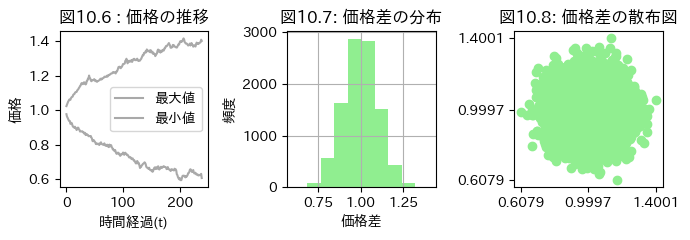

In [11]:
plot_hist_scatter(highlow,p240,'時間経過(t)','価格','価格差','頻度',
                 '図10.6 : 価格の推移','図10.7: 価格差の分布',
                  '図10.8: 価格差の散布図')

In [12]:
descriptive_stats(p240)

,平均,標準偏差,歪度,尖度(0)
p240,0.99966,0.101236,-0.004448,-0.02708


In [13]:
ar240,highlow,dAR=generateTSD(sigma,10000,240,1-0.5,0.5)

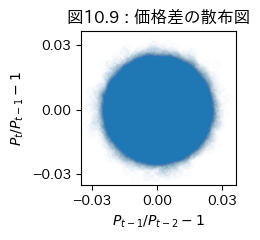

In [14]:
scatter(dAR.shift(),dAR,'図10.9 : 価格差の散布図')

In [15]:
descriptive_stats(dAR)

,平均,標準偏差,歪度,尖度(0)
dAR,-1.883027e-07,0.00744,0.00169,-0.003333


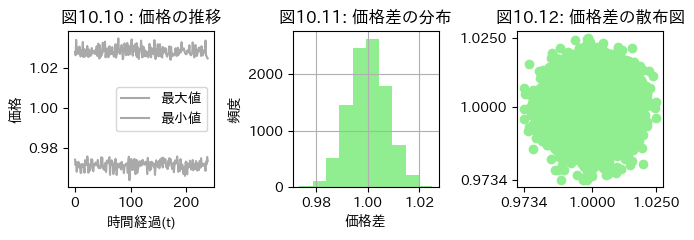

,平均,標準偏差,歪度,尖度(0)
ar240,0.999955,0.007417,-0.028876,-0.022854


In [16]:
plot_hist_scatter(highlow,ar240,'時間経過(t)','価格','価格差','頻度',
                  '図10.10 : 価格の推移','図10.11: 価格差の分布',
                  '図10.12: 価格差の散布図')
descriptive_stats(ar240)

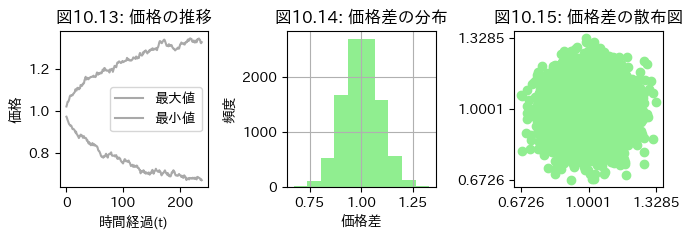

,平均,標準偏差,歪度,尖度(0)
ar240,1.000148,0.089207,0.031537,0.010061


In [17]:
ar240,highlow,dAR=generateTSD(sigma,10000,240,1-0.999,0.999)
plot_hist_scatter(highlow,ar240,'時間経過(t)','価格','価格差','頻度',
                  '図10.13: 価格の推移','図10.14: 価格差の分布',
                  '図10.15: 価格差の散布図')
descriptive_stats(ar240)

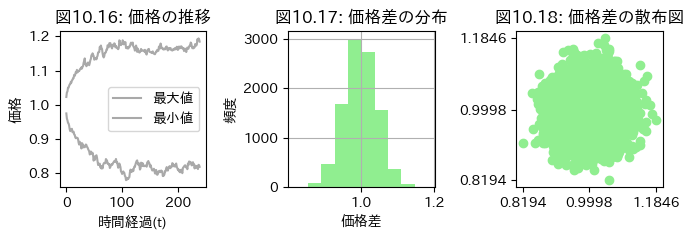

,平均,標準偏差,歪度,尖度(0)
ar240,0.999803,0.045266,0.024466,-0.008494


In [18]:
ar240,highlow,dAR=generateTSD(sigma,10000,240,1-0.99,0.99)
plot_hist_scatter(highlow,ar240,'時間経過(t)','価格','価格差','頻度',
                  '図10.16: 価格の推移','図10.17: 価格差の分布',
                  '図10.18: 価格差の散布図')
descriptive_stats(ar240)

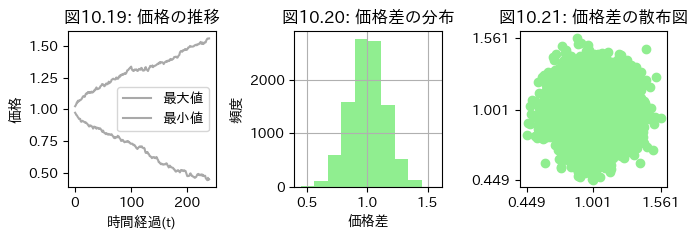

,平均,標準偏差,歪度,尖度(0)
ar240,1.000674,0.151091,-0.01299,0.061964


In [19]:
ar240,highlow,dAR=generateTSD(sigma,10000,240,1-1.003,1.003)
plot_hist_scatter(highlow,ar240,'時間経過(t)','価格','価格差','頻度',
                  '図10.19: 価格の推移','図10.20: 価格差の分布',
                  '図10.21: 価格差の散布図')
descriptive_stats(ar240)

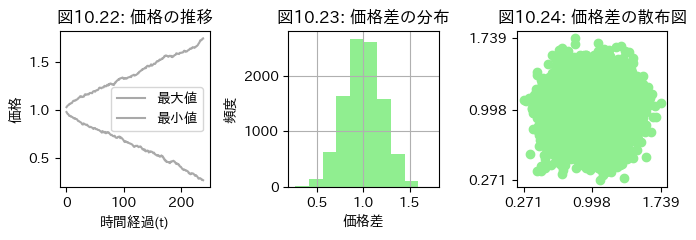

,平均,標準偏差,歪度,尖度(0)
ar240,0.998147,0.205281,-0.049381,-0.064339


In [20]:
ar240,highlow,dAR=generateTSD(sigma,10000,240,1-1.005,1.005)
plot_hist_scatter(highlow,ar240,'時間経過(t)','価格','価格差','頻度',
                  '図10.22: 価格の推移','図10.23: 価格差の分布',
                  '図10.24: 価格差の散布図')
descriptive_stats(ar240)

In [21]:
s = rng.binomial(1, 0.5,10000)
s

array([1, 1, 1, ..., 0, 0, 1], shape=(10000,))

In [22]:
def bernoulli(p,x,N,p0):
    s = (rng.binomial(1, p, N)-0.5)*2*x
    P=p0+s.cumsum()
    return pd.DataFrame(P,columns=['ber'])

In [23]:
def plottsd(tsd,xlabel,ylabel,title):
    P.plot(color='darkgray',figsize=(8,4))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    #plt.savefig(title[:6]+'.jpeg',dpi=600)
    plt.show()

In [24]:
P=bernoulli(0.5,5,10000,0)

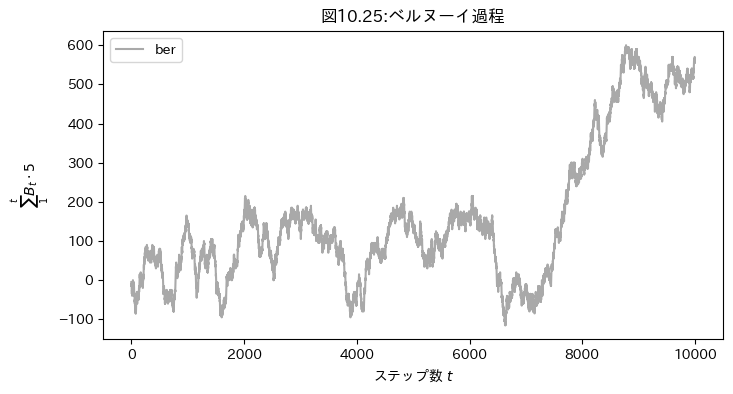

,平均,標準偏差,歪度,尖度(0)
dp,0.056506,4.999931,-0.022607,-1.999889


In [25]:
plottsd(P,'ステップ数 $t$','$\sum_1^t B_t \cdot 5$','図10.25:ベルヌーイ過程')
dp=P.diff().dropna()
descriptive_stats(dp)

In [26]:
def bernoulliProcess(p,x,M,Nooftrial,p0):
    Q=[]
    for j in range(Nooftrial):
        P=bernoulli(p,x,M,p0)
        Q.append(P.iloc[-1].values)
    return pd.DataFrame(Q,columns=['bel-'+str(M)])

In [27]:
def histtsd(tsd,xlabel,ylabel,title):
    Q.hist(histtype='stepfilled',color='darkblue',bins=25,alpha=0.5,
           figsize=(6,3))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    #plt.savefig(title[:6]+".jpeg",dpi=600)
    plt.show()

In [28]:
M=10000
Q=bernoulliProcess(0.5,5,M,10000,0)

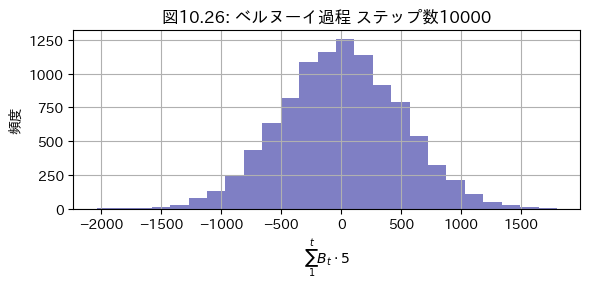

,平均,標準偏差,歪度,尖度(0)
Q,2.724,499.237743,0.005346,-0.016553


In [29]:
histtsd(Q,'$\sum_1^t B_t \cdot 5$','頻度',
        '図10.26: ベルヌーイ過程 ステップ数'+str(M))
descriptive_stats(Q)

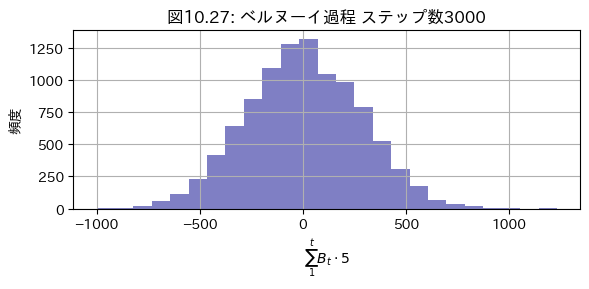

,平均,標準偏差,歪度,尖度(0)
Q,4.93,274.137539,0.020678,-0.019064


In [30]:
M=3000
Q=bernoulliProcess(0.5,5,M,10000,0)
histtsd(Q,'$\sum_1^t B_t \cdot 5$','頻度',
        '図10.27: ベルヌーイ過程 ステップ数'+str(M))
descriptive_stats(Q)

In [31]:
def generateGBM(mu,sigma0,nDays,nSim):
    #np.random.seed(1)
    sigma = np.array([sigma0])
    dt = 1/DAYS
    S = np.array([[0.0 for i in range(nDays+1)] for j in range(nSim)])
    for j in range(nSim):
        rng = np.random.default_rng()
        w=rng.standard_normal( size=(1,nDays)).T
        x = np.exp((mu - 0.5*sigma ** 2) * dt + w*np.sqrt(dt)*sigma)
        x = np.vstack([np.ones(len(sigma)), x])
        x = x.cumprod(axis=0)
        S[j][:]=x.ravel()
    return S

In [32]:
t1=datetime.now()
vol=0.4 #0.65
mu=0.1#0.004
nDays=DAYS*5
S=generateGBM(mu,vol,nDays,1000000)
print(datetime.now()-t1)

0:03:17.537181


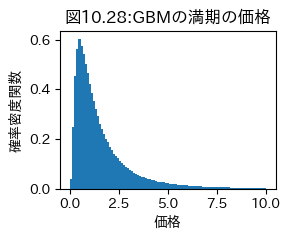

In [33]:
x = np.linspace(0,10, 100)
fig=plt.figure(figsize=(3,2.5))
plt.hist(S[:,nDays],bins=x,density=True)
plt.title('図10.28:GBMの満期の価格')
plt.ylabel('確率密度関数')
plt.xlabel('価格')
plt.tight_layout()
#plt.savefig('図10.28.jpeg',dpi=600)
plt.show()

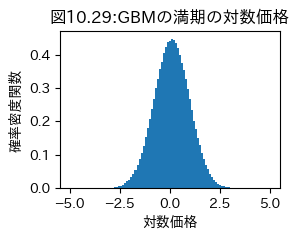

In [34]:
x = np.linspace(-5,5, 100)
fig=plt.figure(figsize=(3,2.5))
plt.hist(np.log(S[:,nDays]),bins=x,density=True)
plt.title('図10.29:GBMの満期の対数価格')
plt.ylabel('確率密度関数')
plt.xlabel('対数価格')
plt.tight_layout()
#plt.savefig('図10.29.jpeg',dpi=600)
plt.show()